# 地学実験II 〜大気の運動を理解するための計算機実習〜
## 京都大学防災研究所 榎本剛
## 2017年8月21〜22日

## 実習1 地球大気の成り立ちと大気大循環

### 地球大気の鉛直構造
地球大気は，下から対流圏（troposphere），成層圏（stratosphere），中間圏（mesosphere），熱圏（thermosphere）に分けられる。
高度約11~kmまでを対流圏と呼び，気温は1~kmつき6.5$^\circ$C下がる。
対流圏では，空気は上下によくかき混ぜられている。
成層圏下部では気温の高度変化が少なく，高度20~kmから約50~kmではオゾンが紫外線を吸収するために，気温が高さとともに上昇している。
対流圏，成層圏，中間圏の上端をそれぞれ対流圏界面（tropopause），成層圏界面（stratopause），中間圏界面（mesopause）と呼ぶ。

国際（米国）標準大気に基づいて気温の高度分布を描いてみよう。

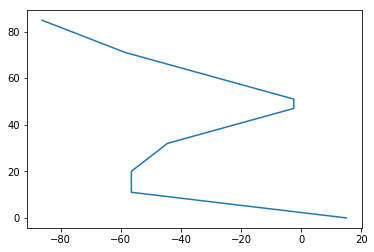

In [1]:
import matplotlib.pyplot as plt
T = [15.0, -56.5, -56.5, -44.5, -2.5, -2.5, -58.5, -86.2]
h = [0., 11, 20., 32., 47, 51., 71, 84.852]
plt.plot(T, h)
plt.show()

### 地球大気の組成
地球大気の組成を次の表に示す。この表にある数値から乾燥大気の平均分子量を計算してみよう。

|成分| 分子量| 容積比|重量比|
|:---|:---:|:----:|:---:|
|窒素 N$_2$| 28.013| 78.08%|75.53%|
|酸素 O$_2$| 32.000| 20.95%|23.15%|
|アルゴン A$_\mathrm{r}$| 39.95| 0.93%|1.283%|
|**水蒸気 H$_2$O**| 18.02| 0〜5%|0〜3%|
|**二酸化炭素 CO$_2$**| 44.01| 380 ppm|557 ppm|
|ネオン N$_\mathrm{e}$| 20.18| 18 ppm|12.5 ppm|
|ヘリウム H$_\mathrm{e}$| 4.00| 5 ppm|0.7 ppm|
|**メタン CH$_4$**| 16.04| 1.75 ppm|0.944 ppm|
|クリプトン K$_\mathrm{r}$| 83.80| 1 ppm|3 ppm|
|水素 H$_2$| 2.02| 0.5 ppm|0.03 ppm|
|**亜酸化窒素 N$_2$O**| 56.03| 0.3 ppm|0.6 ppm|
|**オゾン O$_3$**| 48.00| 0〜0.1 ppm|0〜0.2 ppm|

平均分子量は重量比を$m$，分子量を$M$とすると
$$
\bar{M} = \frac{\sum_i m_i}{\sum_i m_i/M_i}
$$
と定義される。$\sum_i = 1$ kgに対して，上位3つの成分の分子量をそれぞれ28, 32, 40とし重量比が75.5%, 23.2%, 1.3%とすると次のように計算される。

In [2]:
1/(0.755/28 + 0.232/32 + 0.013/40)

28.952538517216418

平均分子量の定義の分母がキロモル分子量$n=m/M$であることに着目すると
$$
\bar{M} = \frac{\sum_i n_i m_i}{\sum_i n_i}
$$
$\sum_i n_i=1$ molに対する$n_i$は容積比を表すので，平均分子量は分子量を容積比で重み付き平均したものになる。上位3つの成分の容積比がそれぞれ78%, 21%, 1%とすると次のように計算できる。

In [3]:
28 * 0.78 + 32 * 0.21 + 40 * 0.01 

28.959999999999997

### 太陽放射と地球放射
入ってきた全ての放射を完全に吸収する仮想的な物体を黒体（black body）と呼ぶ。
次に示すWienの変位則は，黒体放射の極大値をとる波長が温度とともに短くなることを示す。
$$
\lambda_\mathrm{m}T = 2897
$$
太陽放射の極大値が0.5$\mu$mであるとすると太陽の温度は

In [4]:
def calc_T_wien(l):
    lT = 2897
    return lT / l
calc_T_wien(0.5)

5794.0

Wienの変位則は次のPlanck函数から求めたものである。
$$
B_{\lambda}(T) = \frac{c_1}{\lambda^5\pi(\exp(c_2/\lambda T) - 1)}
$$
ここで$c_1 = 2\pi c^2h$Wm$^2$, $c_2 = chk{-1}$mK, 光速$c = 2.998\times 10^8$ms$^{-1}$, Planck定数$h = 6.626\times 10^{-34}$Js, Boltzmann定数$k = 1.381\times 10^{-23}$JK$^{-1}$である。
波長$\lambda$に対して$\lambda B_\lambda(T)$を描いてみよう。

17202714.1756 56.0440591025 306949.825745


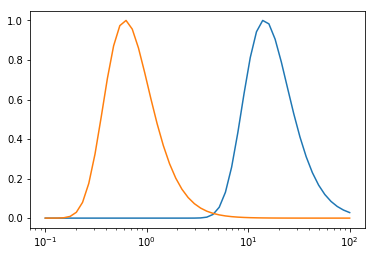

In [5]:
from scipy.constants import pi, c, h, k
import numpy as np
import matplotlib.pyplot as plt

def l_planck_func(l, T):
    c1 = 2 * pi * c**2 * h 
    c2 = c * h / k
    return c1 * l**-4 / (pi * (np.exp(c2/(l * T))-1))

l = np.logspace(-1, 2)
lw = l_planck_func(l * 1e-6, 255)
sw = l_planck_func(l * 1e-6, 6000)
print(sw.max(), lw.max(), sw.max()/lw.max())

lw = lw / lw.max()
sw = sw / sw.max()

plt.semilogx(l, lw)
plt.semilogx(l, sw)

plt.show()

この黒体スペクトルは最大値で規格化されている。
太陽放射に対する最大値は30万倍以上大きいことが分かる。